In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
covid = pd.read_csv('covid_pre_proc.csv', index_col='Unnamed: 0')

In [3]:
covid

,localCaso,sexoCaso,dataNascimento,idadeCaso,racaCor,resultadoFinalExame
0,SOBRAL,MASCULINO,14/08/2003,17.0,Parda,Negativo
1,PACAJUS,MASCULINO,07/11/1983,37.0,Parda,Negativo
2,FORTALEZA,MASCULINO,12/03/1992,28.0,Parda,Negativo
3,CAUCAIA,MASCULINO,06/03/1970,50.0,Sem Informacao,Negativo
4,FORTALEZA,FEMININO,10/01/1939,81.0,Parda,Negativo
...,...,...,...,...,...,...
825972,FORTALEZA,MASCULINO,08/08/1990,30.0,Parda,Positivo
825973,FORTALEZA,FEMININO,08/12/1982,37.0,Branca,Positivo
825974,FORTALEZA,FEMININO,02/12/1980,40.0,Parda,Negativo
825975,FORTALEZA,FEMININO,17/05/1988,32.0,Branca,Provável


**Q1:** Média da idade dos indivíduos representados no dataset.

In [4]:
def Q1(dataset):
    return dataset['idadeCaso'].mean()

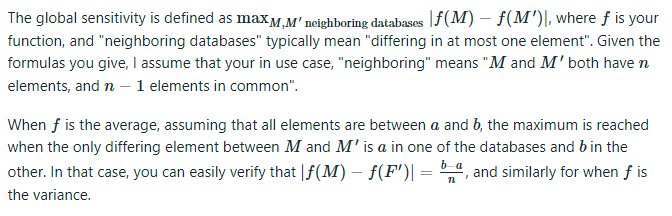

In [5]:
def delta_Q1(dataset):
    # Considering that the oldest person is 120 and the youngest 0, the sensibility is the max difference between two neighboors dataset
    oldest = 120
    youngest = 0
    
    return abs(oldest - youngest)/len(dataset)

**Q2:**  Número de exames positivos (atributo *resultadoFinalExame*).

In [6]:
def Q2(dataset):
    return dataset['resultadoFinalExame'].value_counts()['Positivo']

In [7]:
def delta_Q2(dataset):
    # Count query, sensibility=1
    return 1

**Q3:** Total de exames realizados por município (atributo *municipioCaso*).

In [8]:
def Q3(dataset):
    counties = np.unique(dataset['localCaso'])
    n_exams_county = {}
    for county in counties:
        n_exams = sum(dataset['localCaso'][dataset['localCaso'] == county].value_counts())
        n_exams_county[county] = n_exams
    
    return n_exams_county

In [9]:
def delta_Q3(dataset):
    # Count query, sensibility=1
    return 1

# Ruído de Laplace

In [10]:
def laplace_query(output, delta, eps):
    if isinstance(output, dict):
        eps = eps/len(output)
        cities = list(output.keys())
        counts = list(output.values())
        print("DELTA: {}, Epsilon = {}".format(delta, eps))
        output_noise = counts + stats.laplace.rvs(loc=0, scale=delta/eps, size=len(output))
        output_noise = output_noise.astype(int)     
        print("DELTA: {}, Epsilon = {}".format(delta, eps))
        
        return dict(zip(cities, output_noise))
    
    elif isinstance(output, np.int64):
        return int(output + stats.laplace.rvs(loc=0, scale=delta/eps))
    
    print("DELTA: {}, Epsilon = {}".format(delta, eps))
    return output + stats.laplace.rvs(loc=0, scale=delta/eps)

In [11]:
epsilon = [0.1, 0.5, 1, 10]
queries = [Q1, Q2, Q3]

In [12]:
all_results = []
for q in queries:
    outputs = {}
    for eps in epsilon:
        sensibilidade = locals()['delta_{}'.format(q.__name__)](covid)
        outputs[eps] = laplace_query(q(covid), sensibilidade, eps)
    all_results.append(outputs)

DELTA: 0.00014528249575956716, Epsilon = 0.1
DELTA: 0.00014528249575956716, Epsilon = 0.5
DELTA: 0.00014528249575956716, Epsilon = 1
DELTA: 0.00014528249575956716, Epsilon = 10
DELTA: 1, Epsilon = 0.0005434782608695652
DELTA: 1, Epsilon = 0.0005434782608695652
DELTA: 1, Epsilon = 0.002717391304347826
DELTA: 1, Epsilon = 0.002717391304347826
DELTA: 1, Epsilon = 0.005434782608695652
DELTA: 1, Epsilon = 0.005434782608695652
DELTA: 1, Epsilon = 0.05434782608695652
DELTA: 1, Epsilon = 0.05434782608695652


In [13]:
all_results

[{0.1: 39.13522080364522,
  0.5: 39.13314044341327,
  1: 39.133565551409205,
  10: 39.133418058677904},
 {0.1: 247398, 0.5: 247399, 1: 247398, 10: 247398},
 {0.1: {'ABAIARA': 565,
   'ACARAPE': 7426,
   'ACARAU': 5859,
   'ACOPIARA': 3054,
   'AIUABA': 2681,
   'ALCANTARAS': 2287,
   'ALTANEIRA': 831,
   'ALTO SANTO': 4754,
   'AMONTADA': -5867,
   'ANTONINA DO NORTE': -472,
   'APUIARES': -1043,
   'AQUIRAZ': 3013,
   'ARACATI': 5057,
   'ARACOIABA': 1505,
   'ARARENDA': -2260,
   'ARARIPE': -3710,
   'ARATUBA': -195,
   'ARNEIROZ': -232,
   'ASSARE': 3435,
   'AURORA': -25,
   'BAIXIO': 760,
   'BANABUIU': 3775,
   'BARBALHA': 7889,
   'BARREIRA': 1262,
   'BARRO': 2195,
   'BARROQUINHA': 1917,
   'BATURITÉ': 1571,
   'BEBERIBE': 3180,
   'BELA CRUZ': 6974,
   'BOA VIAGEM': 7382,
   'BREJO SANTO': 13704,
   'CAMOCIM': 13260,
   'CAMPOS SALES': 10,
   'CANINDE': 5444,
   'CAPISTRANO': 1992,
   'CARIDADE': 873,
   'CARIRE': 2266,
   'CARIRIACU': 2606,
   'CARIUS': 2893,
   'CARNAUBAL':

# Plot

In [14]:
all_results[0]['Original'] = Q1(covid)
all_results[1]['Original'] = Q2(covid)
all_results[2]['Original'] = Q3(covid)

In [15]:
erros = abs(np.array(list(all_results[0].values())) - np.array(all_results[0]['Original']))

In [16]:
def plot_graph(query, dict_dp_results):
    if(query == Q1):
        q = 0
    elif(query == Q2):
        q = 1
    else:
        raise Exception("query must be Q1 or Q2") 

    y_ = dict_dp_results[q]['Original']
    
    x = dict_dp_results[q].keys()
    x = list(x)    
    x = [str(ai) for ai in x[:-1]]
    
    y = dict_dp_results[q].values()
    y = list(y)
    y = y[:-1]
   # y = [abs(ai - y_) for ai in y[:-1]]
    
    range_ = max(abs(np.array(y) - y_))
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    plt.plot(x,y, marker='o', color='#d65db1')
    
    plt.hlines(y_, xmin=0, xmax=4, colors='gray', linestyles='--', lw=2, label='Original value')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    
    y_text = [round(ai, 5) for ai in y]
    for index in range(len(x)):
        ax.text(x[index], y[index]+ (max(y)-min(y))*.02, y_text[index], size=12)
    ax.text(min(x), y_+ (max(y)-min(y))*.02, round(y_,5), size=12)
    
    plt.yticks(np.linspace(y_-range_*1.1, y_+range_*1.1, num=6)) 
    
    title = "Diferença entre consulta " + str(query.__name__) + " e o valor original"
    plt.xlabel('epsilon', fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    
    plt.title(title, y=1.08, fontsize=16)


In [17]:
def plot_bar_graph(query, dict_dp_results):
    if(query == Q1):
        q = 0
    elif(query == Q2):
        q = 1
    else:
        raise Exception("query must be Q1 or Q2") 

    y_ = dict_dp_results[q]['Original']
    
    x = dict_dp_results[q].keys()
    x = list(x)    
    x = [str(ai) for ai in x[:-1]]
    
    y = dict_dp_results[q].values()
    y = list(y)
    y = y[:-1]
    y = [abs(ai - y_) for ai in y]
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    plt.bar(x,y, color="#d65db1")
    
    
    y_text = [round(ai, 5) for ai in y]
    for index in range(len(x)):
        ax.text(x[index], y[index]+ (max(y)-min(y))*.02, y_text[index], size=12)
    
    plt.yticks(np.linspace(0, max(y), num=6)) 
    
    title = "Erro da consulta " + str(query.__name__)
    plt.xlabel('epsilon', fontsize=14)
    plt.ylabel('Erro', fontsize=14)
    
    plt.title(title, y=1.02, fontsize=16)


In [18]:
def plot_(query, dict_dp_results, cities):
    cities = np.array(cities)
    if(query == Q3):
        q = 2
    else:
        raise Exception("query must be Q3") 

    
    y = dict_dp_results[q]
    y_keys = y.keys()
    y_values = y.values()
    y = [list(y_keys), list(y_values)]
    y = np.array(y).T
    
    for i in range(len(y)):
        yi = y[i]
        yi_keys = yi[1].keys()
        yi_values = yi[1].values()
        yi_ = [list(yi_keys), list(yi_values)]
        yi_ = np.array(yi_).T
        yi_ = np.array([list(j) for j in yi_ if(j[0] in cities)])
        yi = [yi[0], yi_]

        y[i] = yi
    
    y_ = y[-1]
    y = y[:-1]
    
    x = dict_dp_results[q].keys()
    x = list(x)    
    x = [str(ai) for ai in x[:-1]]
    
    width = 0.4
    range_ = np.arange(len(y_[1][:,0]))
    
    for i in range(len(x)):
        fig, ax = plt.subplots(figsize=(20,5))
        plt.bar(range_-(width/2),np.array(y[i][1][:,1], dtype=float), log=True, width=width, color='#d65db1', label='Anonimizada')
        plt.bar(range_+(width/2),np.array(y_[1][:,1], dtype=float), log=True, width=width, color='#ffc75f', label='Original')
        plt.xticks(range_, y[0][1][:,0], rotation='vertical')
        title = "Resultado da consulta " + str(query.__name__) + " anonimizada comparado ao da original (escala log)"
        plt.title(title, fontsize=16)
        plt.xlabel('Local', fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        plt.legend()


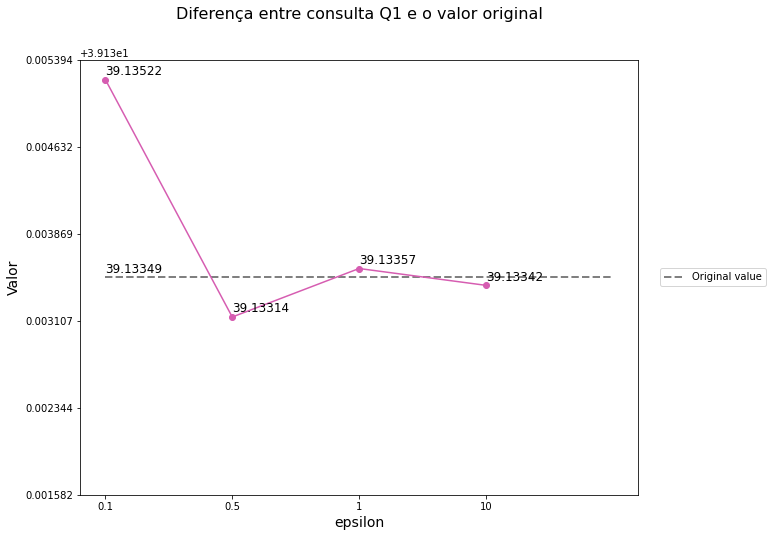

In [19]:
plot_graph(Q1, all_results)

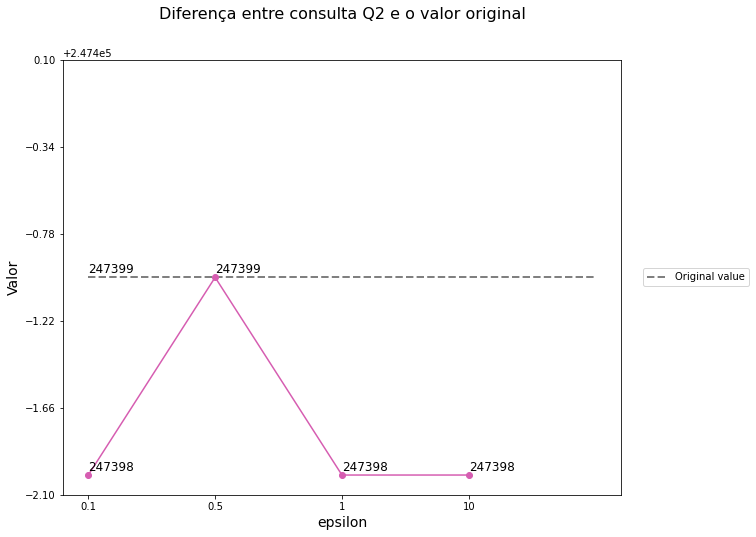

In [20]:
plot_graph(Q2, all_results)

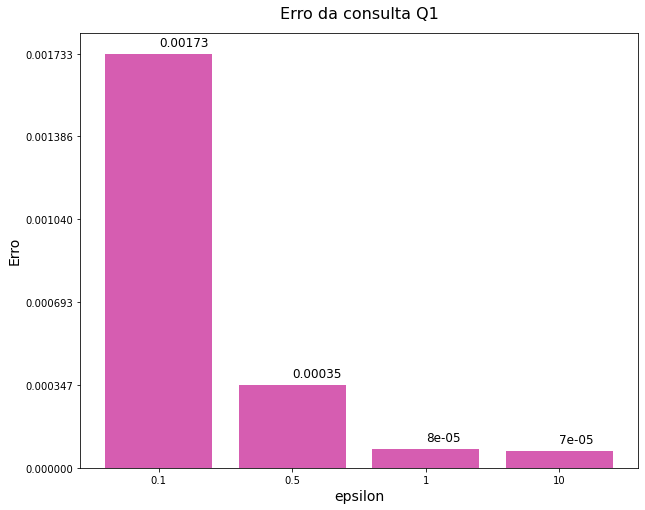

In [21]:
plot_bar_graph(Q1, all_results)

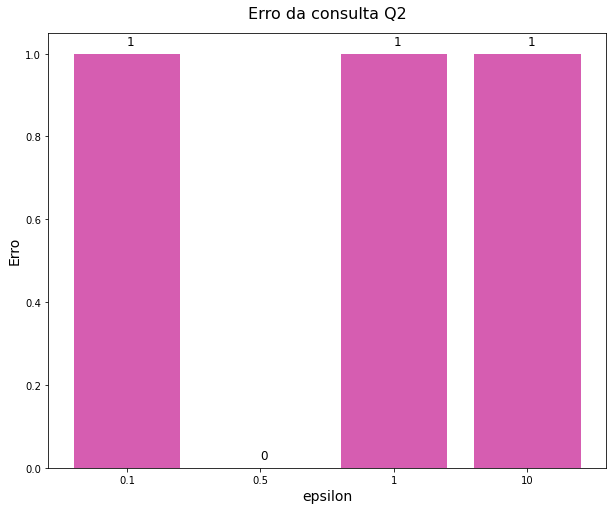

In [22]:
plot_bar_graph(Q2, all_results)

In [23]:
cities_to_plot = ['AQUIRAZ', 'CAUCAIA', 'CASCAVEL', 'CHOROZINHO', 'EUSÉBIO', 'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ', 'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PARACURU', 'PARAIPABA', 'PINDORETAMA', 'SÃO LUÍS DO CURU', 'SÃO GONÇALO DO AMARANTE', 'TRAIRI']   

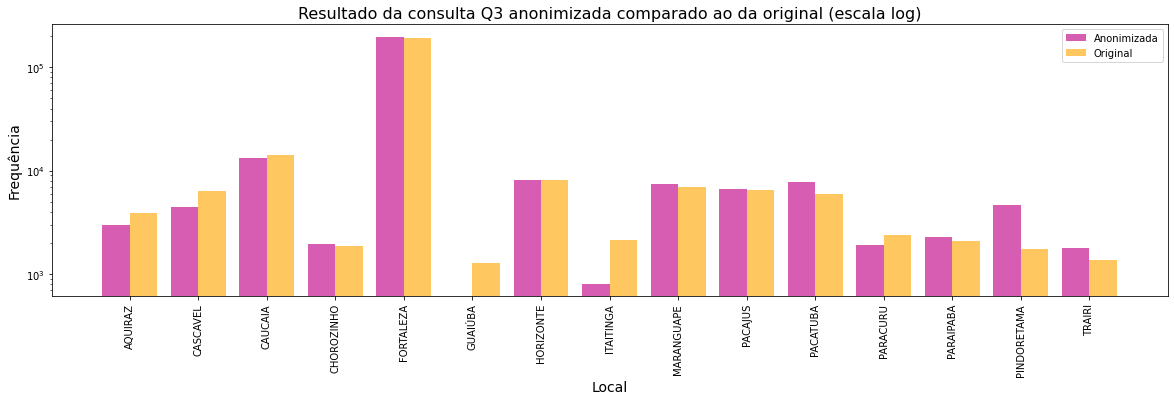

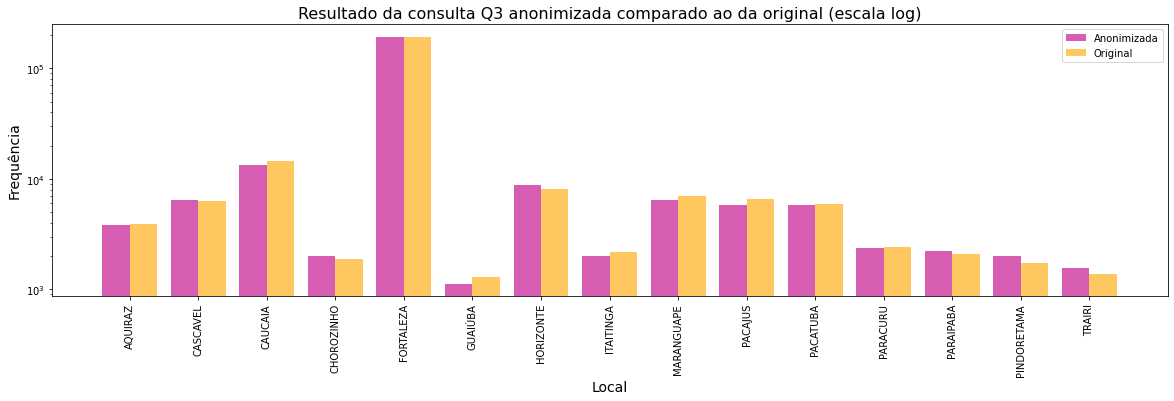

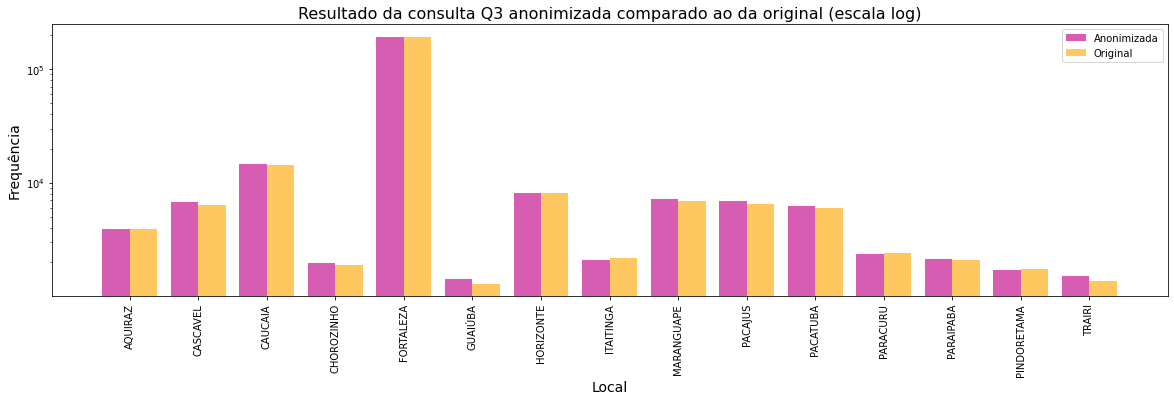

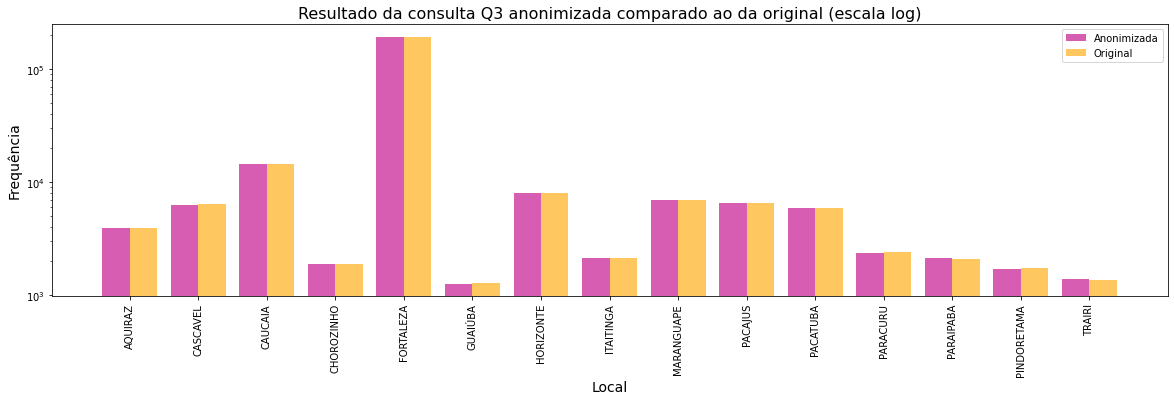

In [24]:
plot_(Q3, all_results, cities_to_plot)